In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
data = pd.read_csv('C:\\Users\\Gaurav\\Downloads\\TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [4]:
closing_prices = data['Close'].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [7]:
sequence_length = 60

In [8]:
X, y = create_sequences(scaled_prices, sequence_length)

In [9]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
73/73 [==============================] - 5s 16ms/step - loss: 1.6654e-04
Epoch 2/100
73/73 [==============================] - 1s 15ms/step - loss: 6.1125e-06
Epoch 3/100
73/73 [==============================] - 1s 15ms/step - loss: 6.0617e-06
Epoch 4/100
73/73 [==============================] - 1s 15ms/step - loss: 5.4127e-06
Epoch 5/100
73/73 [==============================] - 1s 15ms/step - loss: 6.1109e-06
Epoch 6/100
73/73 [==============================] - 1s 16ms/step - loss: 4.9092e-06
Epoch 7/100
73/73 [==============================] - 1s 15ms/step - loss: 4.7885e-06
Epoch 8/100
73/73 [==============================] - 1s 14ms/step - loss: 4.6532e-06
Epoch 9/100
73/73 [==============================] - 1s 14ms/step - loss: 4.5078e-06
Epoch 10/100
73/73 [==============================] - 1s 17ms/step - loss: 4.3165e-06
Epoch 11/100
73/73 [==============================] - 1s 16ms/step - loss: 3.9452e-06
Epoch 12/100
73/73 [==============================] - 1s 17ms/s

73/73 [==============================] - 1s 16ms/step - loss: 1.3535e-06
Epoch 97/100
73/73 [==============================] - 1s 16ms/step - loss: 1.2430e-06
Epoch 98/100
73/73 [==============================] - 1s 17ms/step - loss: 1.2843e-06
Epoch 99/100
73/73 [==============================] - 1s 16ms/step - loss: 1.5842e-06
Epoch 100/100
73/73 [==============================] - 1s 17ms/step - loss: 1.2638e-06


In [12]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

19/19 [==============================] - 0s 7ms/step


In [13]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

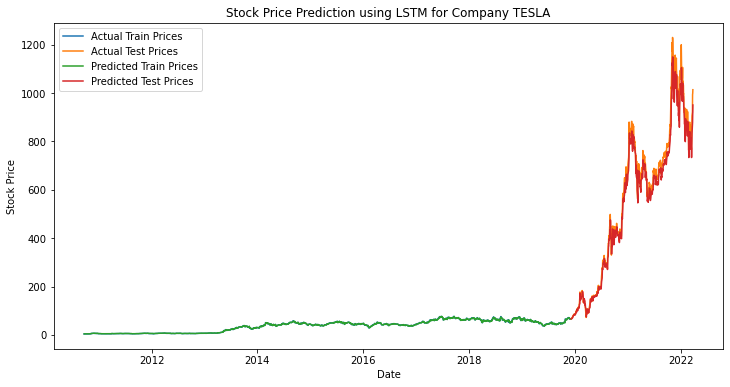

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[sequence_length:train_size+sequence_length], y_train, label='Actual Train Prices')
plt.plot(data.index[train_size+sequence_length:], y_test, label='Actual Test Prices')
plt.plot(data.index[sequence_length:train_size+sequence_length], train_predictions, label='Predicted Train Prices')
plt.plot(data.index[train_size+sequence_length:], test_predictions, label='Predicted Test Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM for Company TESLA')
plt.legend()
plt.show()